### Introduction to `numpy` and plotting with `matplotlib`
Hi there,
this notebook introduces you to the python library `numpy` which allows us to effectively handle data.
Furthermore, we will learn how to inspect and visualize such data by making plots with `matplotlib`.
Why should you try to understand this `boring` tutorial? These basics will be important later on, when we look into real gravitational wave data and learn more about physics!

### 1. `numpy` arrays
Let's start with the basic idea of `numpy`: `numpy` is python library that allows us to generate and modify large amounts of data.

"Why would we need that?", you might ask?
Imagine, you are measuring the temperature outside your window every hour. This will give you a series of numbers in degrees Celsius (in Europe) or degree Fahrenheit (in the US).

It could for example look like this:
- 8 am: 15°C
- 9 am: 15°C
- 10 am: 17°C
- 11 am: 18°C
- 12 am: 19°C
- 1 pm: 20°C
- 2 pm: 22°C
- 3 pm: 23°C
- 4 pm: 23°C
- 5 pm: 21°C
- 6 pm: 19°C
- 7 pm: 18°C
- 8 pm: 16°C

The temperature values have some order since they are ordered according to the time throughout the day.
Now, we would like to visualize this data and show how the temperature changes during the day. How would you do this? Maybe you can draw the on pencil and paper?

Tipp: The time should be on the horizontal axis (x-axis) and the temperature on the vertical axis (y-axis).

However, this is procedure is time-consuming if you have to do this manually every day.
A sheet of paper is also not so nice to send via email.
That's why we use computer based tools like `numpy` and `matplotlib` to help us with making a nice visualization.

So let's start:

(A) How do we represent the list of temperatures with `numpy`?
- Before we can use `numpy`, we have to import it: `import numpy as np`. `as np` means that `np` is the abbreviation for `numpy` such that we have to type less letters. To execute the notebook cell, you can hold the `shift` and `enter`/`return` keys simultaneously. After a few seconds, you should see a symbol indicating that the cell has been executed without an error. Easy!

In [1]:
import numpy as np

- For the temperature values, we use a `numpy` array. An array is a vector of numerical values. (We do not use a standard python list `a = [15, 17, ...]` because we cannot perform mathematical operations like adding or subtracting values easily.)
- To define a `numpy` array, we need to give it the values that the array should contain. In our case, those are the temperatures.

In [2]:
temperatures = np.array([15, 15, 17, 18, 19])

(B) How do we look at variables in python?
 - To look at the variable `temperatures`, we can write `print(temperatures)` in the following cell and execute it.

In [3]:
print(temperatures)

[15 15 17 18 19]


- You can also look at the type of the `temperatures` object via `type(temperatures)`. This should be a `numpy.ndarray`:

In [4]:
type(temperatures)

numpy.ndarray

- But wait! We didn't use the `print(...)` command! Why can we still see it?
- This is a feature of jupyter notebooks. If the last line in a cell is a variable, it's content is printed. You can try removing the `print(...)` from `temperatures` and see if you can still see the values. What do you see when you have multiple lines in a notebook cell?

(C) How do we get the third measurement value from `temperatures`?
- This is called indexing and we need the index of the third temperature value to do this. The index of the first element is always `0` in `numpy` (which might be strange at first). The second element has the index `1`, etc.

For the temperatures:
- Index 0: 15°C
- Index 1: 15°C
- Index 2: 17°C
- Index 3: ...

- We index into `temperatures` via putting the index in square brackets behind the variable `temperatures`

In [5]:
print(temperatures[2])

17


Great, but how can we include temperature values from multiple days?
Maybe you would create separate variables `temperatures_day1`, `temperatures_day2`, `temperatures_day3`, ..., but this would be very complicated if you measured the temperatures for 10 consecutive days!
This is why *matrices* were invented! In a matrix, you have not only one row of values, but you can stack multiple rows!

| Hour  | 8 am          | 9 am           | 10 am         | 11 am | 12 am         | ... |
|-------|---------------|----------------|---------------|-------|---------------|-----|
| Day 1 | 15°C | 15°C  | 17°C | 18°C | 19°C | ... |
| Day 2 | 14°$C | 15°C | 16°C | 16°C | 17°C | ... |
| Day 3 | 13°C | 13°C | 14°C | 16°C | 16°C | ... |

(C) How to define a matrix?

In [6]:
temperature_three_days = np.array([
    [15, 15, 17, 18, 19],
    [14, 15, 16, 16, 17],
    [13, 13, 14, 16, 16],
])
temperature_three_days

array([[15, 15, 17, 18, 19],
       [14, 15, 16, 16, 17],
       [13, 13, 14, 16, 16]])

- If you just want to know the shape of your array, you can use `array.shape`:

In [7]:
temperature_three_days.shape

(3, 5)

- Here, the first entry are the rows, i.e., how many days you were measuring, and the columns correspond to the number of hours for which you have measurements.
- What shape does the old `temperatures` array have?

In [8]:
# ...

(D) How to index into a matrix
- If you are interested in the temperatures on the third day, you again can use the square brackets behind the variable. But now you need to provide information about the row axis as well and you will get an error with `temperature_three_days[3]`. Can you explain why?
- Instead, we need to pass two indices, the first for the row (which day), the second for the column (which hour or measurement).

In [9]:
print(temperature_three_days[0, 2]) # This corresponds to the first day, the third measurement (i.e. 10 am)
print(temperature_three_days[1, 2]) # What do these indices refer to?
print(temperature_three_days[0, 4]) # And what about this value?
print(temperature_three_days[0, :]) # This prints all values (due to `:`) on the first day!
print(temperature_three_days[1, :]) # What does this print?
print(temperature_three_days[:, 2]) # And what is this?

17
16
19
[15 15 17 18 19]
[14 15 16 16 17]
[17 16 14]


Great, now we know the basics of `numpy` arrays. We will keep learning new `numpy` commands over the course of the full tutorial.
How can we now visualize our temperature values?

### 2. Plotting with `matplotlib.pyplot`
 We use the visualization package `matplotlib` which is commonly imported as `plt`:

In [10]:
import matplotlib.pyplot as plt

(A) Let's start by visualizing the single `temperatures` array first.
- In order to plot the temperature values, we need to tell the computer, at which value of the horizontal axis (x-axis) which temperature value should be visualized. In our case, those are the hours.
- Instead of showing 8 am, 9 am, 10 am,... on the x-axis, we will just show the number of the measurement, starting from 1:

Like this:
- Measurement 1 (8 am): 15°C
- Measurement 2 (9 am): 15°C
- Measurement 3 (10 am): 17°C
- Measurement 4 (11 am): 18°C
- Measurement 5 (12 am): 19°C

Instead of typing each value individually, we use a helpful `numpy` function called `np.arange` which generates a vector of values like `[start, start+step, start+ 2*step, ..., stop - step]` (with `stop` excluded!):

In [11]:
measurement_numbers = np.arange(start=1, stop=6, step=1)
print(measurement_numbers)

[1 2 3 4 5]


- We can check if the array `temperature` and `measurement_numbers` have the same length via `len(array)`. How could you also check this with `.shape`?

In [12]:
print(len(measurement_numbers), len(temperatures))

5 5


(B) Plotting `temperatures`
- For plotting the arrays `measurement_numbers` against `temperatures`, we use the function `plt.plot(x, y)`, where the x-axis is given by the first array and the y-axis corresponds to the second value.

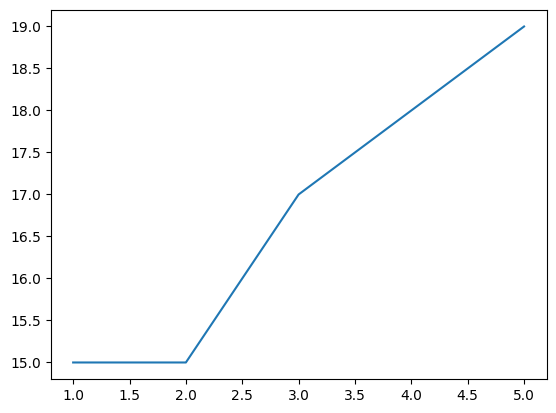

In [13]:
plt.plot(measurement_numbers, temperatures); # Remove the ;, what does it do?

Yeey, you made your first plot!!!

(C) Making a plot more beautiful
- It is always good practice to write on the x- and y-axis what quantity you are showing. In our case `Temperature` and `Measurement number`, which we can add via `plt.xlabel()` and `plt.ylabel()`.
- With the lines, it is not immediately clear at which x-value we actually took a measurement. Therefore, we want to show a dot at the datapoints we actually collect. We can just add the marker information as a string `"-o"` to show lines with dots.

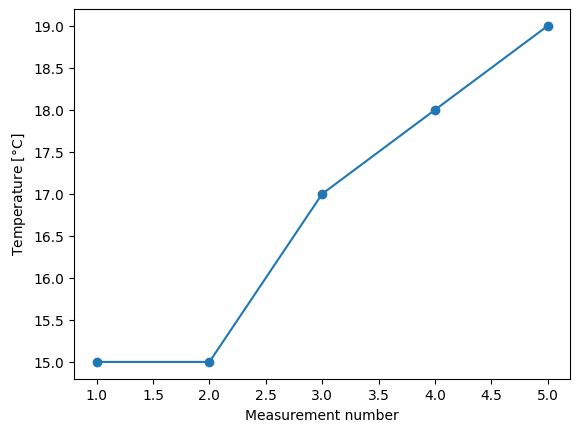

In [14]:
plt.plot(measurement_numbers, temperatures, "-o")
plt.xlabel('Measurement number')
plt.ylabel(r'Temperature [$\degree$C]'); # The dollar signs are needed such that \degree is shown as the small circle. This is LaTeX code, but we will not go into detail here.

(D) Plot all three temperature curves in one plot
- As a next step, we want to compare the three temperature curves that we measured on consecutive days. Ideally, we want to visualize all of them in the same plot and use different colors for the different measurements.
- For this, we use a `for`-loop to iterate over the different days. Do we have to iterate over rows or columns of `temperature_three_days`?

0
1
2


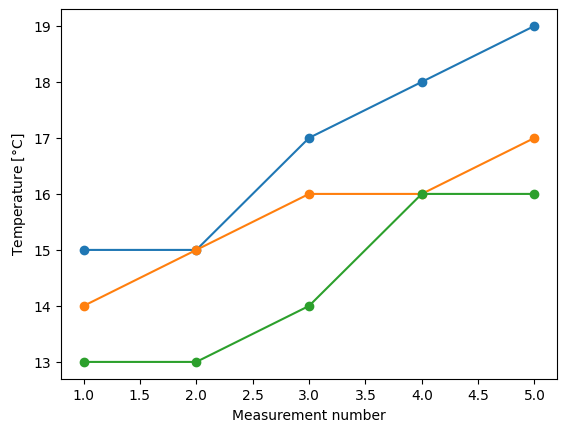

In [15]:
for i in range(temperature_three_days.shape[0]): # Is i the row or column index?
    print(i)
    plt.plot(measurement_numbers, temperature_three_days[i, :], '-o')
plt.xlabel('Measurement number')
plt.ylabel(r'Temperature [$\degree$C]');

- Great, `matplotlib` automatically acjusted the color for us! But you can also pass colors you select yourself, by putting names from [this website](https://matplotlib.org/stable/gallery/color/named_colors.html) into a list.
- The color is then passed to `plt.plot(..., colors=...,)` through the keyword `color`.

0
1
2


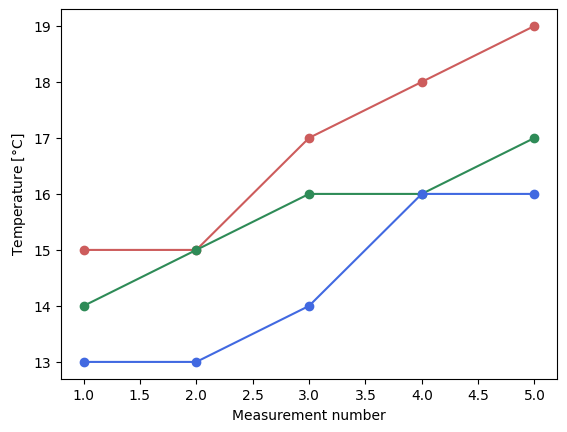

In [16]:
colors = ["indianred", "seagreen", "royalblue"]
for i in range(temperature_three_days.shape[0]): # Is i the row or column index?
    print(i)
    plt.plot(measurement_numbers, temperature_three_days[i, :], '-o', color=colors[i])
plt.xlabel('Measurement number')
plt.ylabel(r'Temperature [$\degree$C]');

- But the colors red and green together are hard to see for color-blind people (~10 % of men are colorblind!!!). Can you change the colors?

In [17]:
# Put your code here

- We also want to know which color corresponds to which day of measurements. This is usually shown in a `legend`, which we can activate via `plt.legend()`.

/var/folders/3s/k8hkbxc95rs93_htsl1k_sb00002q4/T/ipykernel_41275/1038811665.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


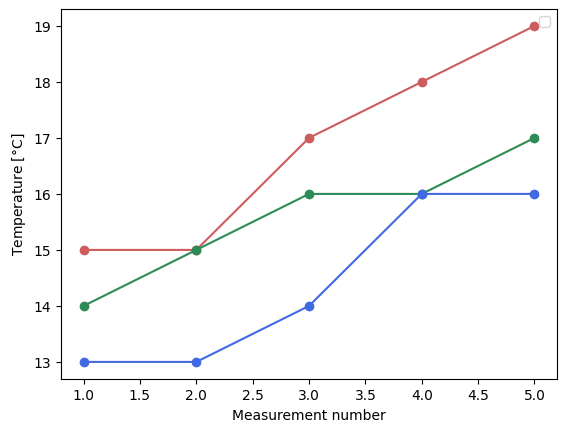

In [18]:
for i in range(temperature_three_days.shape[0]):
    plt.plot(measurement_numbers, temperature_three_days[i, :], '-o', color=colors[i])
plt.xlabel('Measurement number')
plt.ylabel(r'Temperature [$\degree$C]')
plt.legend();

- Mhm, this gives us a warning. What do you think the warning means?
- What changes when we add `label=f"Day {i}"` to `plt.plot`?

/var/folders/3s/k8hkbxc95rs93_htsl1k_sb00002q4/T/ipykernel_41275/2704288302.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


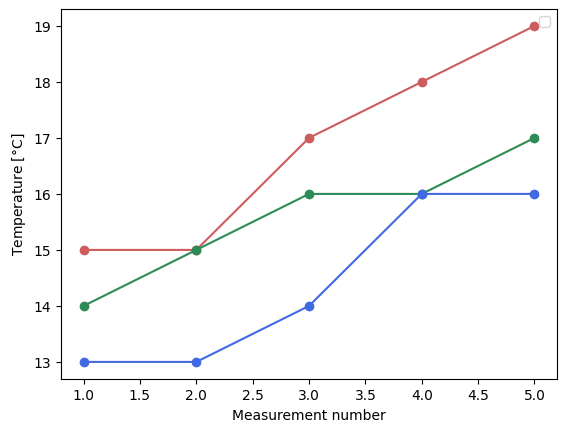

In [19]:
for i in range(temperature_three_days.shape[0]):
    plt.plot(measurement_numbers, temperature_three_days[i, :], '-o', color=colors[i]) # Modify here
plt.xlabel('Measurement number')
plt.ylabel(r'Temperature [$\degree$C]')
plt.legend();

Great, you learned how to do simple plotting in `matplotlib` and how to use `numpy` arrays.
Since you only remember things, if you practice and do them yourself, here are some exercises for you.

### 3. Exercises for temperature data
1. Replace the `temperatures_three_days` array by another array that contains values for the whole day, not just 8 to 12 am. How does the dimension of the array change and why?
2. Can you re-do the plot from above with the new data?

In [20]:
# You can put your code here and add notebook cells!

### 4. Exercises with `sin(x)` and `cos(x)`
You might have seen the `sin(x)` and `cos(x)` functions in your maths classes. These functions are very important in physics since they describe the movement of a particle on a circle. You can look at [this great visualization](https://www.youtube.com/watch?v=fPPDVTVRnfY) to see how this works.

We now want to plot those functions with `numpy` and `matplotlib`. The great thing is that `numpy` has those functions implemented for us! For example, `np.sin(np_array)` with `np_array = np.array([0, 0.1, 0.2])` will compute us the correct sine values for us. This is very helpful.

Exercises:
1. Create an array for the x-axis spanning `[0, 0.1, 0.2, ..., 2.5]` with `np.arange`.
2. Compute the y-values via `np.sin(...)` and `np.cos(...)`.
3. Plot the sinus and cosine values vs. the x-axis values.
4. Make the plot beautiful.

In [21]:
# Put your code here

Questions:
- What changes in the plot if you replace the distance between the x-axis points from `0.1` to `0.5` or even `1`?

In [22]:
# Put your code here